In [23]:
# import packages for data nalysis
import numpy as np
import pandas as pd

from sklearn import svm

# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(font_scale=1.2)

In [24]:
recipes = pd.read_csv("Cupcakes vs Muffins.csv")
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanila,Salt
0,Muffin,55,78,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


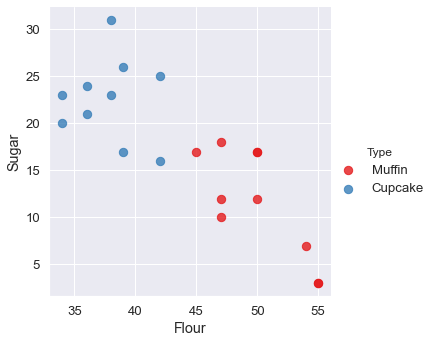

In [25]:
# ploting our data
sns.lmplot("Flour", "Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.show()

In [26]:
# formatting or pre processing our data
type_label = np.where(recipes["Type"]=="Muffin", 0, 1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanila ', 'Salt']

In [27]:
ingredients = recipes[["Flour", "Sugar"]].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [28]:
# fitting our model
model = svm.SVC(kernel="linear")
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [29]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0] / w[1])

# plotting the parallels to the separating hyoerplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

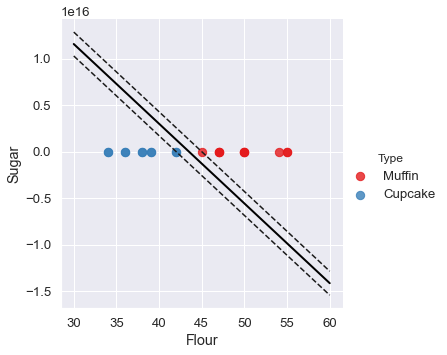

In [35]:
sns.lmplot("Flour", "Sugar", data=recipes, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.show()

In [ ]:
# create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print("You're looking at a muffin recipe!")
    else:
        print("You're looking at a cupcake recipe!")

# predict if 50 parts flo